In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [85]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission_df = pd.read_csv('gender_submission.csv')

In [86]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleaning
#### Check for missing values

In [87]:
missing_values = train_df.isnull().sum()
missing_values[missing_values > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### Handle Missing Values

In [88]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Cabin'].fillna('Unknown', inplace=True)

In [89]:
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Cabin'].fillna('Unknown', inplace=True)

#### Check for duplicates

In [90]:
duplicates = train_df.duplicated().sum()

# Remove duplicates if any
train_df.drop_duplicates(inplace=True)

#### Correct Datatype

In [91]:
# Ensure all columns have appropriate data types.

train_df['Survived'] = train_df['Survived'].astype('category')
train_df['Pclass'] = train_df['Pclass'].astype('category')
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Embarked'] = train_df['Embarked'].astype('category')

#### Handle Outliers

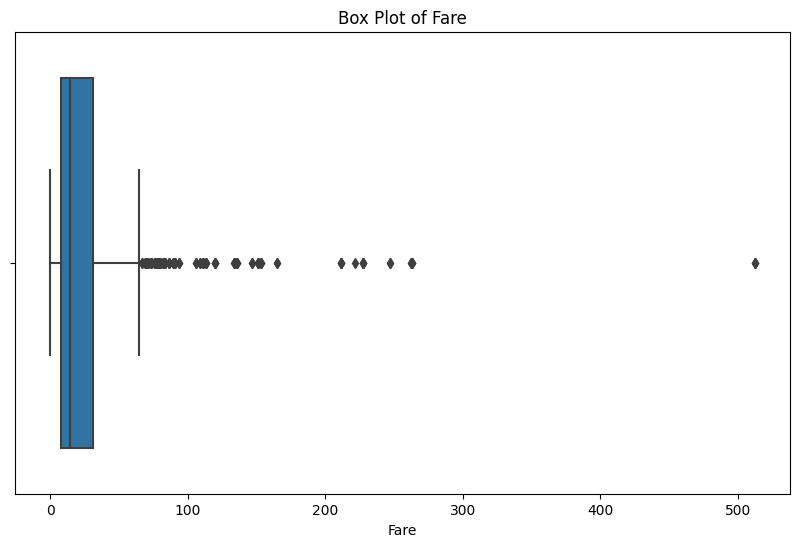

In [92]:
# Identify outliers in numerical data.

plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['Fare'])
plt.title('Box Plot of Fare')
plt.show()

In [93]:
# Cap the 'Fare' values at the 99th percentile
fare_cap = train_df['Fare'].quantile(0.99)
train_df.loc[train_df['Fare'] > fare_cap, 'Fare'] = fare_cap

#### Normalize or Scale Data

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])

### Exploratory Data Analysis (EDA)

#### Descriptive Statistics

In [95]:
# Generate summary statistics for numerical and categorical features.

numerical_summary = train_df.describe()

categorical_summary = train_df.describe(include=['category'])

### Data Visualization

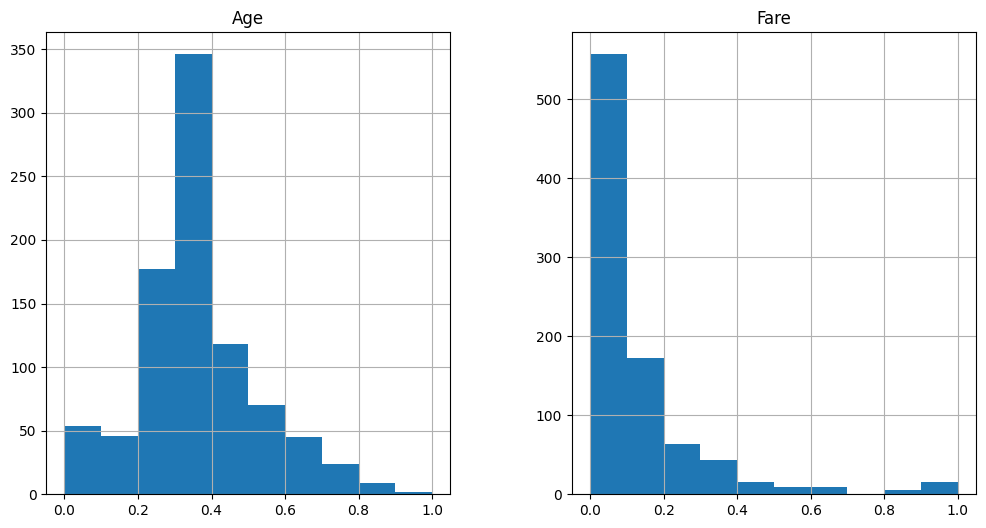

In [96]:
# Histogram

train_df[['Age', 'Fare']].hist(figsize=(12, 6))
plt.show()

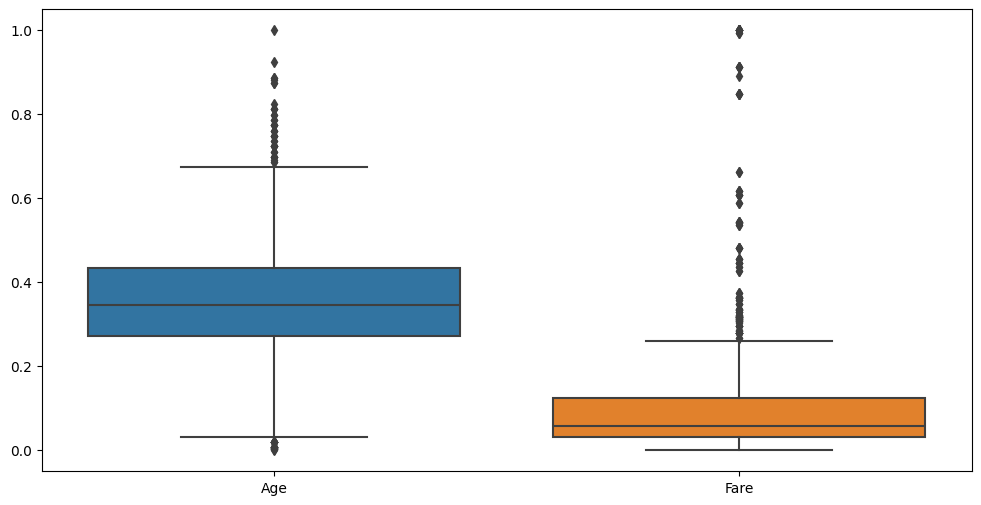

In [97]:
# Box Plot for numerical features

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df[['Age', 'Fare']])
plt.show()

d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


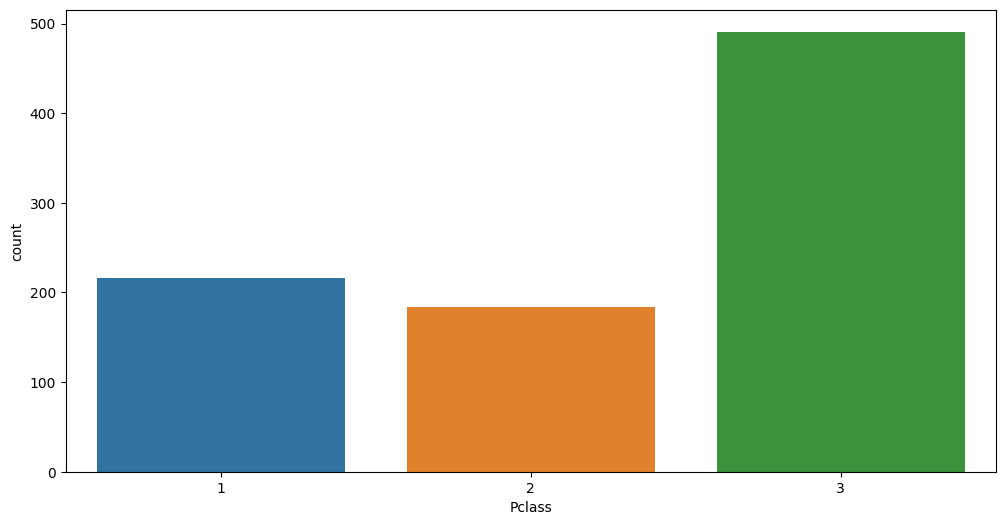

d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


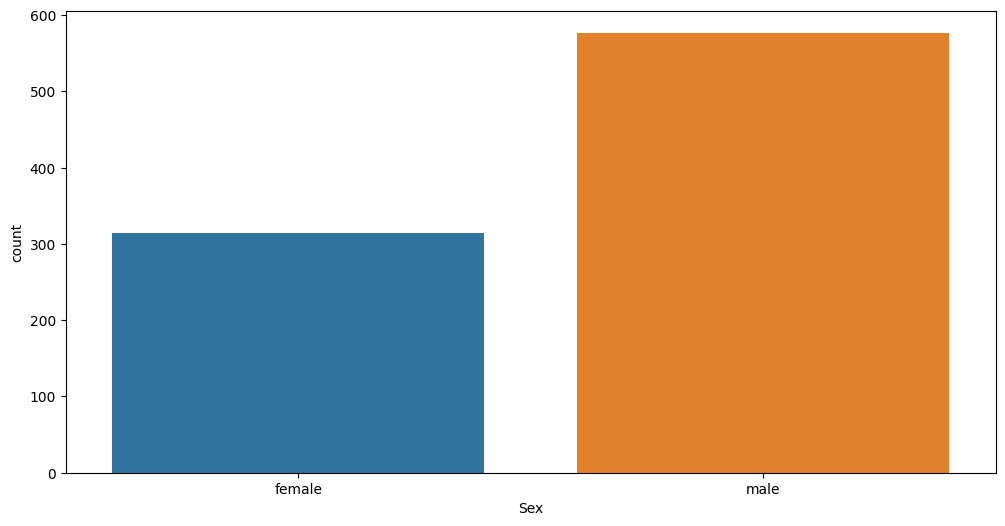

In [98]:
# Bar plots for categorical features
plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', data=train_df)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Sex', data=train_df)
plt.show()

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of panda

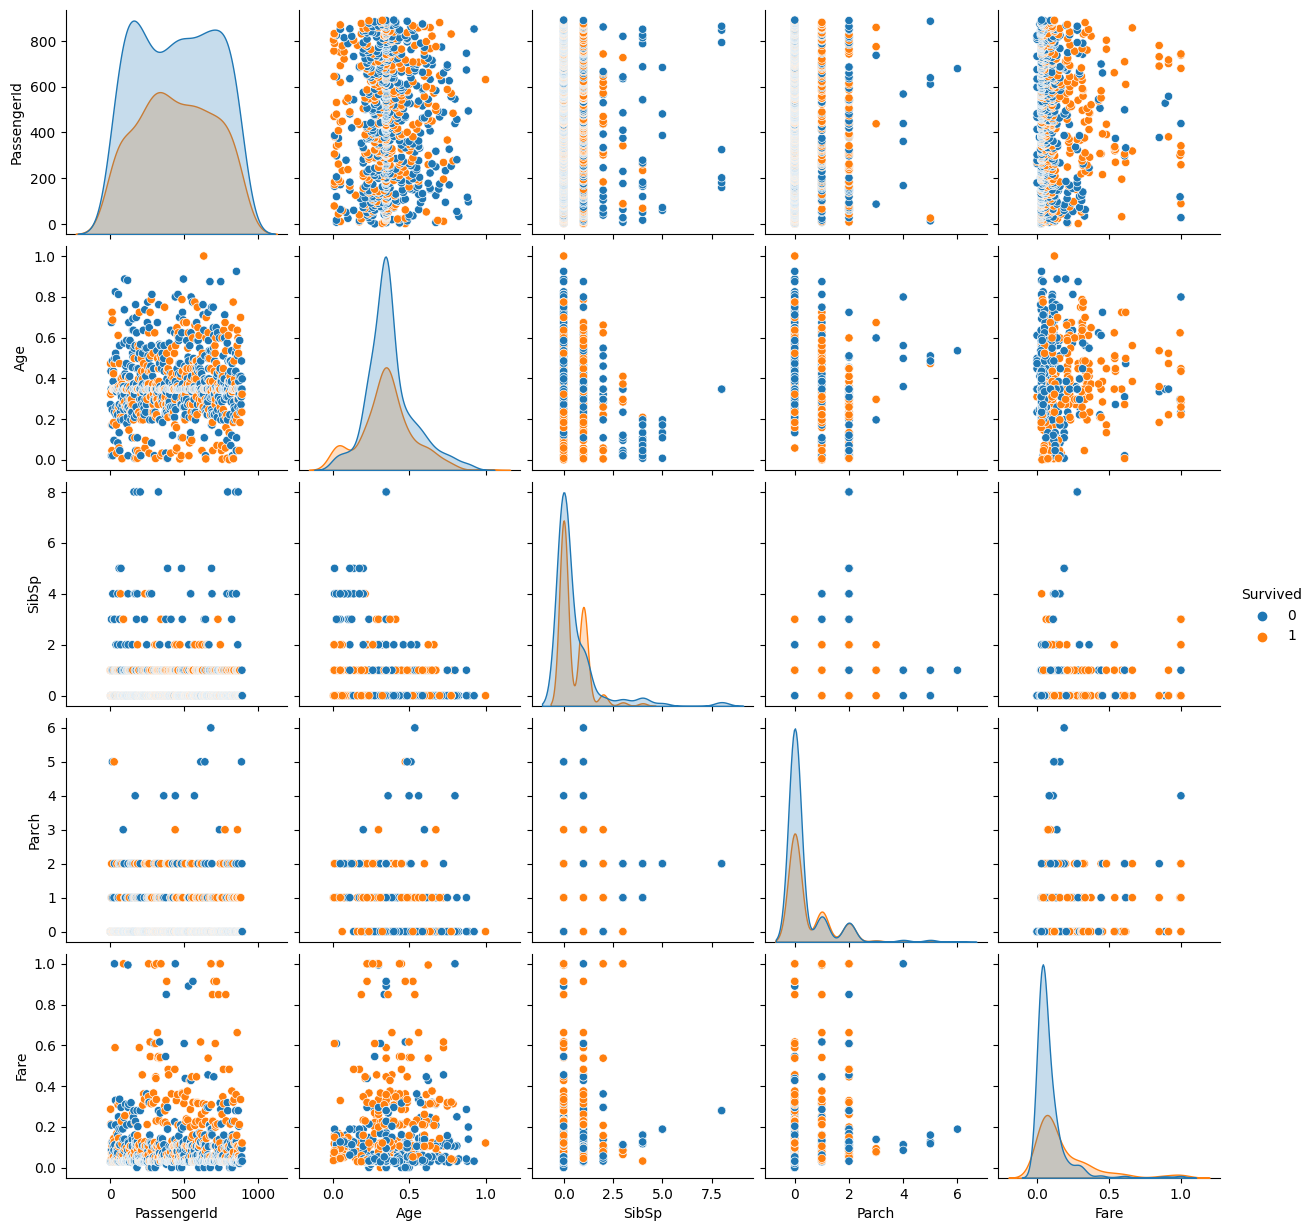

In [99]:
# Pair plot
sns.pairplot(train_df, hue='Survived', diag_kind='kde')
plt.show()

d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


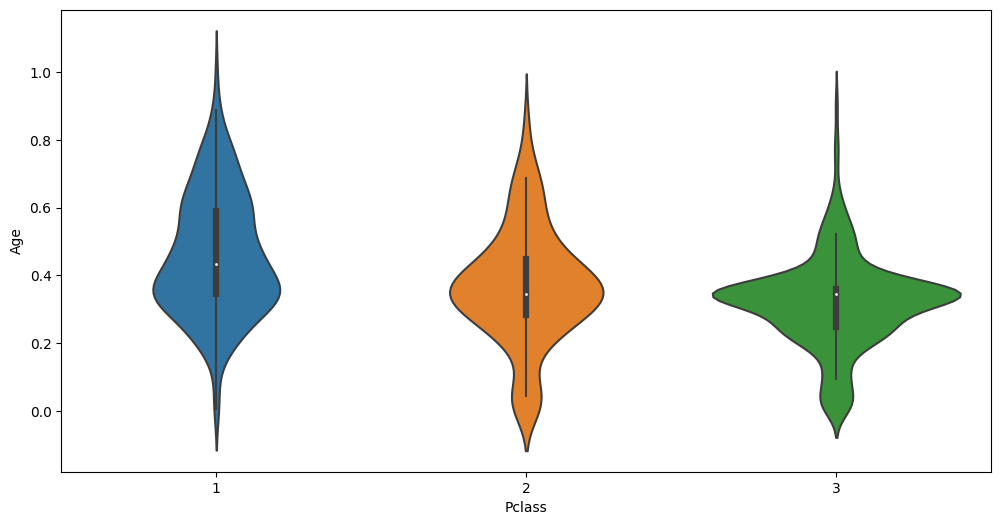

d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


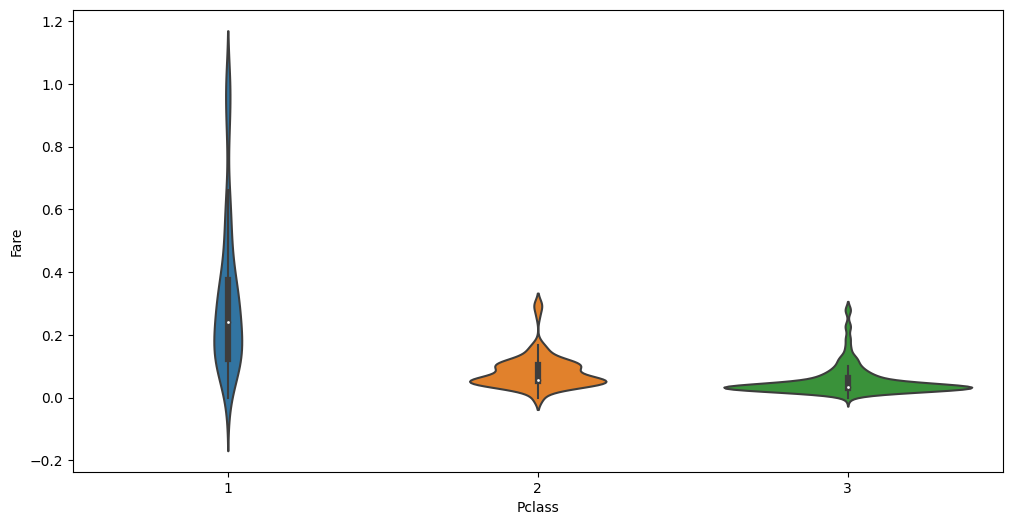

In [100]:
# Violin plots for numerical features across different categories
plt.figure(figsize=(12, 6))
sns.violinplot(x='Pclass', y='Age', data=train_df)
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Pclass', y='Fare', data=train_df)
plt.show()

### Explore Relationships and Patterns

#### Correlation Analysis

In [101]:
# Select only numerical columns for correlation matrix
numerical_columns = train_df.select_dtypes(include=['number']).columns
correlation_matrix = train_df[numerical_columns].corr()

print(correlation_matrix)

             PassengerId       Age     SibSp     Parch      Fare
PassengerId     1.000000  0.034212 -0.057527 -0.001652  0.006677
Age             0.034212  1.000000 -0.233296 -0.172482  0.103594
SibSp          -0.057527 -0.233296  1.000000  0.414838  0.192869
Parch          -0.001652 -0.172482  0.414838  1.000000  0.248623
Fare            0.006677  0.103594  0.192869  0.248623  1.000000


In [102]:
# Group by 'Pclass' and 'Survived' with observed=False
grouped = train_df.groupby(['Pclass', 'Survived'], observed=False).size().unstack()

In [103]:
# Convert 'Survived' to numerical for aggregation
train_df['Survived'] = train_df['Survived'].astype(int)

# Pivot table for survival rate by 'Sex' and 'Pclass'
pivot_table = train_df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean')

print(pivot_table)

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


## Feature Interaction

d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


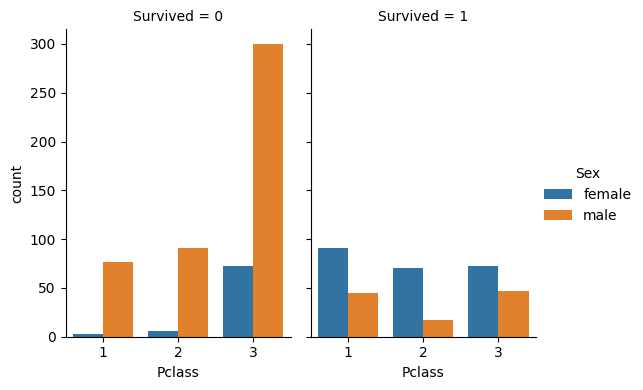

In [104]:
# Interaction between 'Sex' and 'Pclass' on survival
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=train_df, kind='count', height=4, aspect=0.7)
plt.show()

### Categorical Variable Analysis

In [105]:
from scipy.stats import chi2_contingency

# Chi-square test between 'Sex' and 'Survived'
contingency_table = pd.crosstab(train_df['Sex'], train_df['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)